In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.signal import square, sawtooth
import os

https://www.szynalski.com/tone-generator/

In [ ]:

def tone(f, t, waveform='sin', fs=44100):
    """
    Генерирует звуковой тон с заданными параметрами.
    
    :param f: частота сигнала (Гц)
    :param t: длительность сигнала (сек)
    :param waveform: форма сигнала ('sin', 'cos', 'square', 'triangle', 'saw')
    :param fs: частота дискретизации (Гц)
    :return: numpy массив значений сигнала
    """
    t_values = np.linspace(0, t, int(fs * t), endpoint=False)
    
    if waveform == 'sin':
        signal = np.sin(2 * np.pi * f * t_values)
    elif waveform == 'cos':
        signal = np.cos(2 * np.pi * f * t_values)
    elif waveform == 'square':
        signal = square(2 * np.pi * f * t_values)
    elif waveform == 'triangle':
        signal = sawtooth(2 * np.pi * f * t_values, width=0.5)
    elif waveform == 'saw':
        signal = sawtooth(2 * np.pi * f * t_values)
    else:
        raise ValueError("Неподдерживаемая форма сигнала. Используйте 'sin', 'cos', 'square', 'triangle' или 'saw'.")
    
    return signal


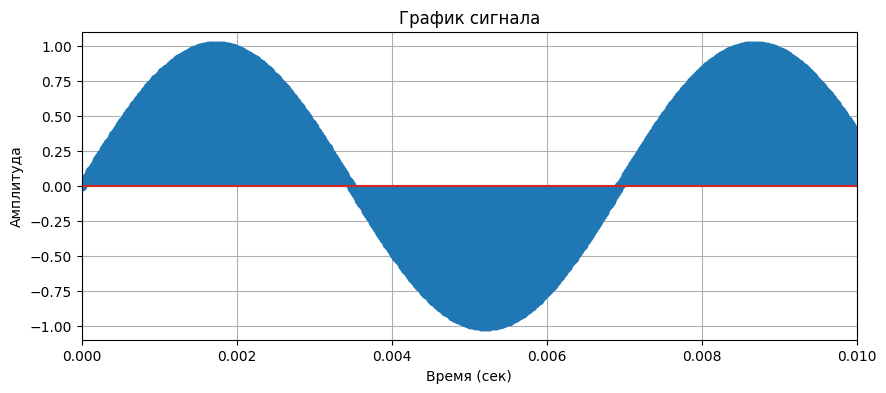

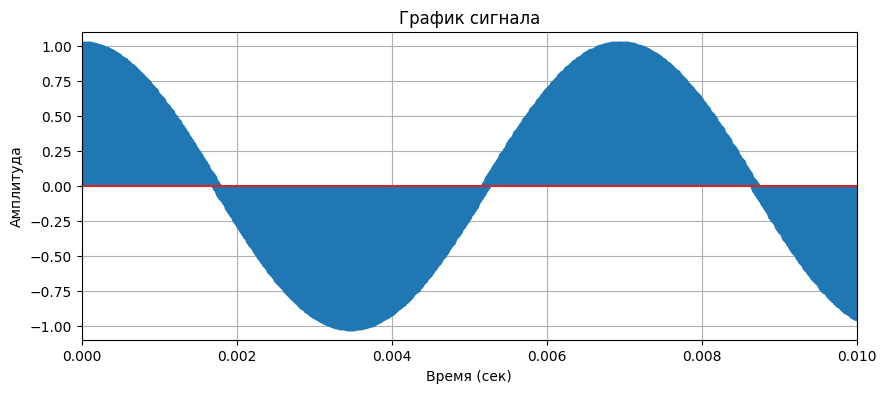

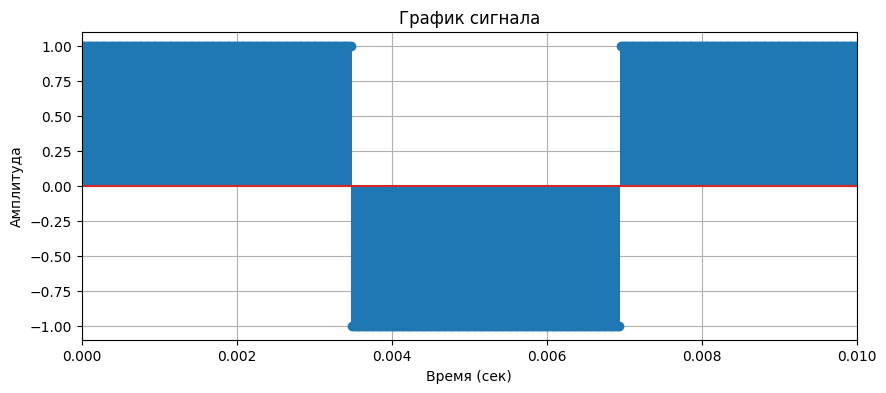

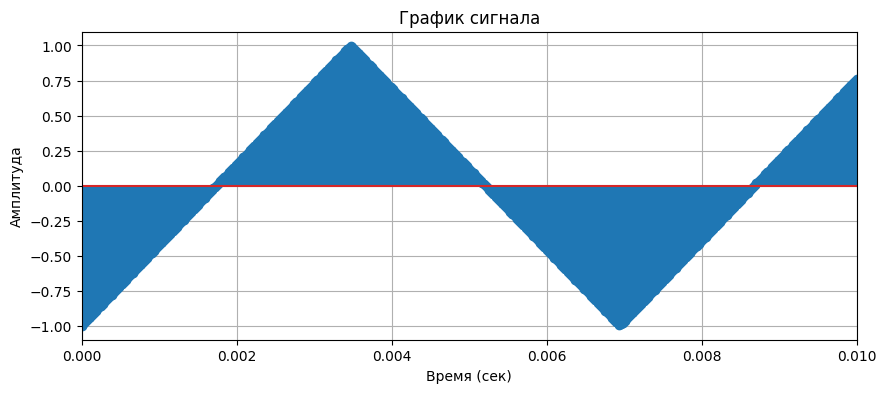

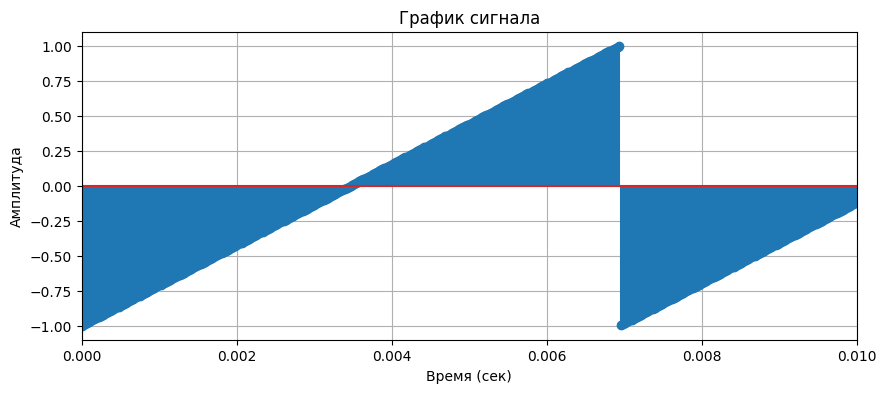

/файл сохранен: tone_sound/tone_saw.wav


In [19]:
fs = 44100
f = 144  
t = 1  

waves =  ["sin", "cos", "square", "triangle","saw"]
for wave in waves:
    signal = tone(f, t, wave ,fs)

    plt.figure(figsize=(10, 4))
    plt.xlim(0, 0.01 ) 
    plt.stem(np.linspace(0, t, int(fs * t)), signal[:int(fs * t)])
    plt.title("График сигнала")
    plt.xlabel("Время (сек)")
    plt.ylabel("Амплитуда")
    plt.grid()
    plt.show()
    folder = "tone_sound"
    if not os.path.exists(folder):
        os.makedirs(folder)
    filename = f"{folder}/tone_{wave}.wav"
    write(f"{filename}", fs, (signal * 32767).astype(np.int16))
print(f"/файл сохранен: {filename}")
    

In [15]:
def musical_tone(f, t, waveform='sin', fs=44100, db=-20):
    """
    Генерирует затухающий составной тон, содержащий обертоны.
    
    :param f: частота основного тона (Гц)
    :param t: длительность сигнала (сек)
    :param waveform: форма сигнала ('sin', 'cos', 'square', 'triangle', 'saw')
    :param fs: частота дискретизации (Гц)
    :param db: уровень затухания в децибелах (по умолчанию -20 дБ)
    :return: numpy массив значений сигнала
    """
    
    time_values = np.linspace(0, t, int(fs * t), endpoint=False)
    # Основной тон + 4 обертона
    harmonics = [1, 2, 3, 4, 5]  
    amplitudes = [1.0, 0.6, 0.4, 0.3, 0.2] 

    signal = np.zeros_like(time_values)

    for h, amp in zip(harmonics, amplitudes):
        if waveform == 'sin':
            signal += amp * np.sin(2 * np.pi * f * h * time_values)

        elif waveform == 'cos':
            signal += amp * np.cos(2 * np.pi * f * h * time_values)

        elif waveform == 'square':
            signal += amp * square(2 * np.pi * f * h * time_values)

        elif waveform == 'triangle':
            signal += amp * sawtooth(2 * np.pi * f * h * time_values, width=0.5)

        elif waveform == 'saw':
            signal += amp * sawtooth(2 * np.pi * f * h * time_values)
            
        else:
            raise ValueError("Неподдерживаемая форма сигнала. Используйте 'sin', 'cos', 'square', 'triangle' или 'saw'.")

    # Нормализация сигнала к амплитуде 1
    signal /= np.max(np.abs(signal))

    alpha = np.log(10 ** (db / 20)) / (fs * t)  # Коэффициент затухания
    envelope = np.exp(alpha * np.arange(len(signal)))  # Экспоненциальная огибающая

    signal *= envelope

    return signal


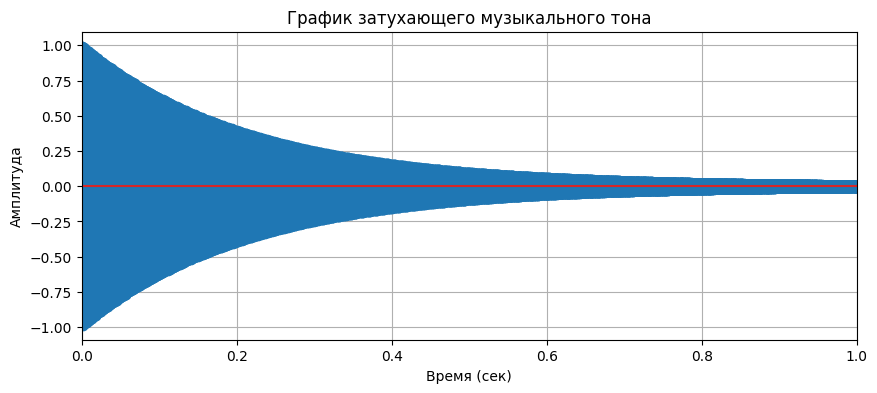

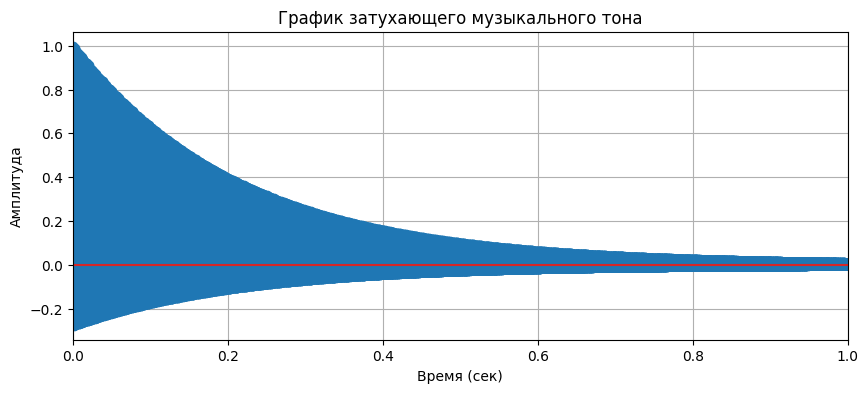

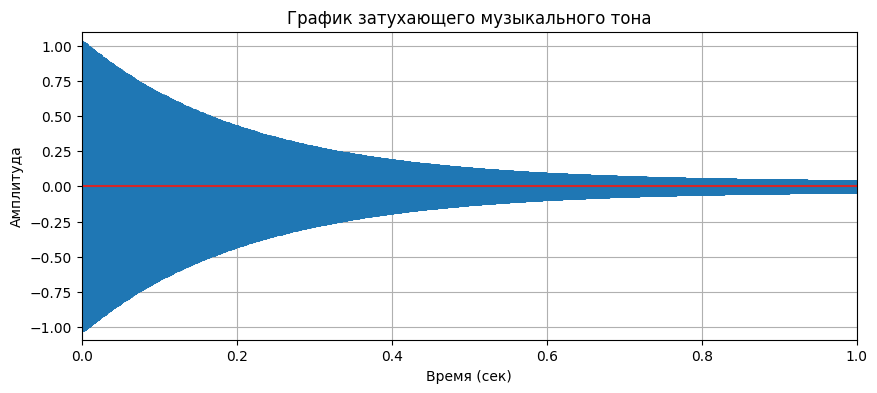

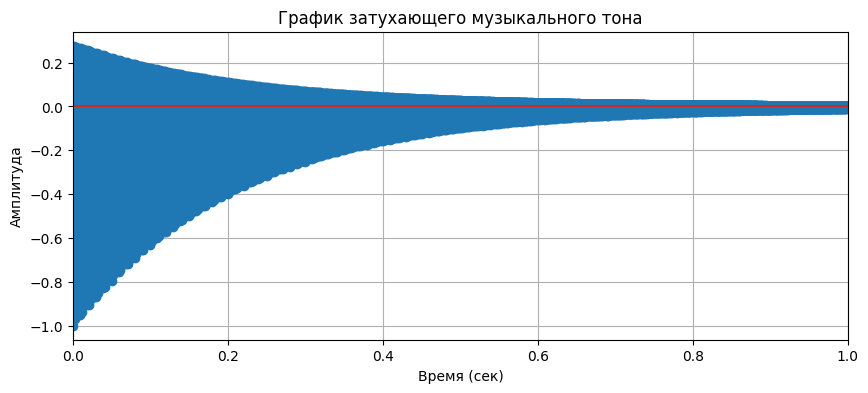

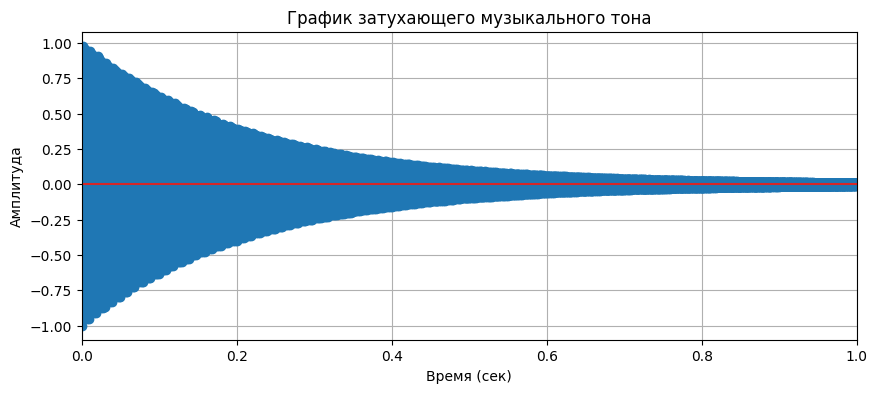

файл сохранен: musical_tone/saw_musicalTone.wav


In [20]:
fs = 44100 
f = 440
t = 1 
db = -40
waves = ["sin","cos", "square","triangle","saw"]
for wave in waves: 
    musical_signal = musical_tone(f,t,wave, fs, db)

    plt.figure(figsize=(10, 4))
    plt.xlim(0, 1)
    plt.stem(np.linspace(0, t, int(fs * t)), musical_signal[:int(fs * t)])
    plt.title("График затухающего музыкального тона")
    plt.xlabel("Время (сек)")
    plt.ylabel("Амплитуда")
    plt.grid()
    plt.show()
    folder_path = "musical_tone"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    musical_filename = f"{folder_path}/{wave}_musicalTone.wav"
    write(musical_filename, fs, (musical_signal * 32767).astype(np.int16))

print(f"файл сохранен: {musical_filename}")

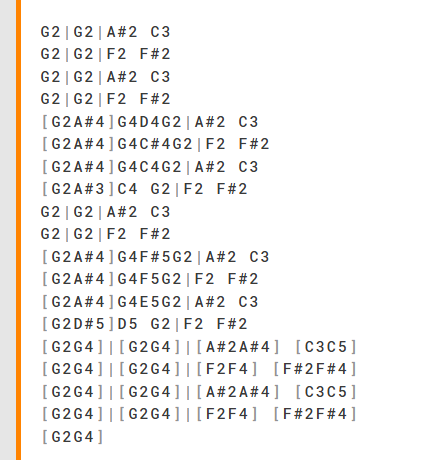
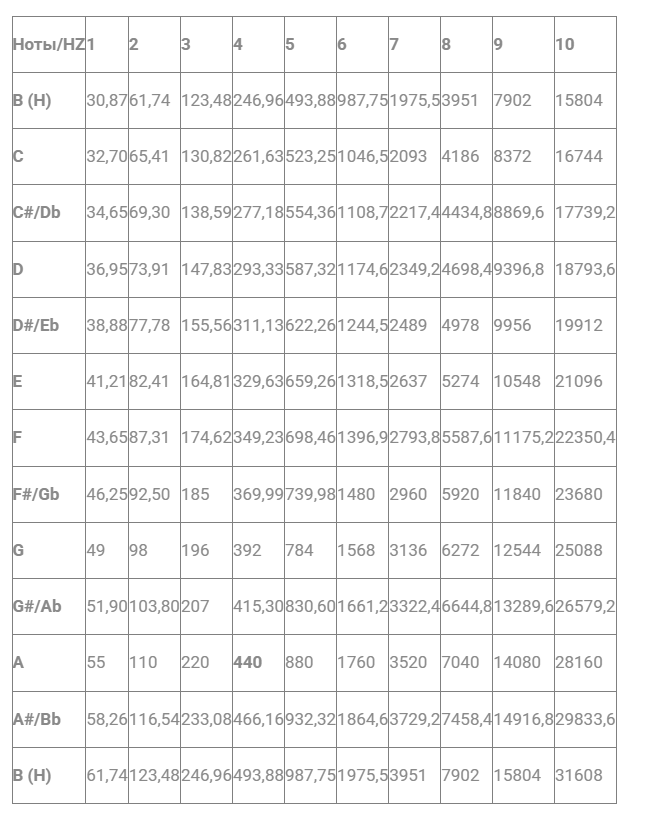

In [ ]:

# Частоты нот (в Гц)

varyFast = 0.3
fast = 0.5
mindle = 0.7
long = 1
MyMelody = [
    ("G2", mindle), ("G2", mindle), ("A#2", fast), ("C3", fast),  
    ("G2", mindle), ("G2", mindle), ("F2", fast), ("F#2", fast),    
    ("G2", mindle), ("G2", mindle), ("A#2", fast), ("C3", fast),
    ("G2", mindle), ("G2", mindle), ("F2", fast), ("F#2", fast),

    ("G2",fast), ("A#4", fast), ("G4", fast), ("D4", fast), ("G2", fast), ("A#2", varyFast), ("C3", varyFast),

    ("G2",fast), ("A#4", fast), ("G4", fast), ("C#4", fast), ("G2", fast), ("F2", varyFast), ("F#2", varyFast),
    
    ("G2",fast), ("A#4", fast), ("G4", fast), ("C4", fast), ("G2", fast), ("A#2", varyFast), ("C3", varyFast),

    ("G2",fast), ("A#3", fast), ("C4", mindle), ("G2", mindle), ("F2", mindle), ("F#2", fast)

]
note_frequencies = {"C0": 16.35, "C#0": 17.32, "C#0": 17.32, "D0": 18.35, "D#0": 19.45, "D#0": 19.45, "E0": 20.60, "F0": 21.83, "F#0": 23.12, "F#0": 23.12, "G0": 24.50, "G#0": 25.96, "G#0": 25.96, "A0": 27.50, "A#0": 29.14, "A#0": 29.14, "B0": 30.87,
    "C1": 32.70, "C#1": 34.65, "C#1": 34.65, "D1": 36.71, "D#1": 38.89, "D#1": 38.89, "E1": 41.20, "F1": 43.65, "F#1": 46.25, "F#1": 46.25, "G1": 49.00, "G#1": 51.91, "G#1": 51.91, "A1": 55.00, "A#1": 58.27, "A#1": 58.27, "B1": 61.74,
    "C2": 65.41, "C#2": 69.30, "C#2": 69.30, "D2": 73.42, "D#2": 77.78, "D#2": 77.78, "E2": 82.41, "F2": 87.31, "F#2": 92.50, "F#2": 92.50, "G2": 98.00, "G#2": 103.83, "G#2": 103.83, "A2": 110.00, "A#2": 116.54, "A#2": 116.54, "B2": 123.47,
    "C3": 130.81, "C#3": 138.59, "C#3": 138.59, "D3": 146.83, "D#3": 155.56, "D#3": 155.56, "E3": 164.81, "F3": 174.61, "F#3": 185.00, "F#3": 185.00, "G3": 196.00, "G#3": 207.65, "G#3": 207.65, "A3": 220.00, "A#3": 233.08, "A#3": 233.08, "B3": 246.94,
    "C4": 261.63, "C#4": 277.18, "C#4": 277.18, "D4": 293.66, "D#4": 311.13, "D#4": 311.13, "E4": 329.63, "F4": 349.23, "F#4": 369.99, "F#4": 369.99, "G4": 392.00, "G#4": 415.30, "G#4": 415.30, "A4": 440.00, "A#4": 466.16, "A#4": 466.16, "B4": 493.88,
    "C5": 523.25, "C#5": 554.37, "C#5": 554.37, "D5": 587.33, "D#5": 622.25, "D#5": 622.25, "E5": 659.25, "F5": 698.46, "F#5": 739.99, "F#5": 739.99, "G5": 783.99, "G#5": 830.61, "G#5": 830.61, "A5": 880.00, "A#5": 932.33, "A#5": 932.33, "B5": 987.77,
    "C6": 1046.50, "C#6": 1108.73, "C#6": 1108.73, "D6": 1174.66, "D#6": 1244.51, "D#6": 1244.51, "E6": 1318.51, "F6": 1396.91, "F#6": 1479.98, "F#6": 1479.98, "G6": 1567.98, "G#6": 1661.22, "G#6": 1661.22, "A6": 1760.00, "A#6": 1864.66, "A#6": 1864.66, "B6": 1975.53,
    "C7": 2093.00, "C#7": 2217.46, "C#7": 2217.46, "D7": 2349.32, "D#7": 2489.02, "D#7": 2489.02, "E7": 2637.02, "F7": 2793.83, "F#7": 2959.96, "F#7": 2959.96, "G7": 3135.96, "G#7": 3322.44, "G#7": 3322.44, "A7": 3520.00, "A#7": 3729.31, "A#7": 3729.31, "B7": 3951.07,
    "C8": 4186.01, "C#8": 4434.92, "C#8": 4434.92, "D8": 4698.64, "D#8": 4978.03, "D#8": 4978.03, "E8": 5274.04, "F8": 5587.65, "F#8": 5919.91, "F#8": 5919.91, "G8": 6271.93, "G#8": 6644.88, "G#8": 6644.88, "A8": 7040.00, "A#8": 7458.62, "A#8": 7458.62, "B8": 7902.13}

fs = 44100
melodySignal = np.array([], dtype=np.float64)

for note, duration in MyMelody:
    if note in note_frequencies:
        tone_signal = musical_tone(note_frequencies[note], duration, waveform='sin', fs=fs, db=-20)
        melodySignal = np.concatenate((melodySignal, tone_signal))
    # Добавляем короткую паузу между нотами
    melodySignal = np.concatenate((melodySignal, np.zeros(int(fs * 0.1))))

# Нормализация сигнала
melodySignal /= np.max(np.abs(melodySignal))

filename = "mission_imposible_melody.wav"
write(filename, fs, (melodySignal * 32767).astype(np.int16))

print(f"файл сохранен: {filename}")